In [1]:
import pandas as pd 
import numpy as np


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/MehmetAliKOYLU/Dataset/refs/heads/main/School%20Ratings.csv')
data.head()

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 347 non-null    object 
 1   school_rating        347 non-null    float64
 2   size                 347 non-null    float64
 3   reduced_lunch        347 non-null    float64
 4   state_percentile_16  347 non-null    float64
 5   state_percentile_15  341 non-null    float64
 6   stu_teach_ratio      347 non-null    float64
 7   school_type          347 non-null    object 
 8   avg_score_15         341 non-null    float64
 9   avg_score_16         347 non-null    float64
 10  full_time_teachers   347 non-null    float64
 11  percent_black        347 non-null    float64
 12  percent_white        347 non-null    float64
 13  percent_asian        347 non-null    float64
 14  percent_hispanic     347 non-null    float64
dtypes: float64(13), object(2)
memory usage: 

In [4]:
data.describe()

,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
count,347.000000,347.000000,347.000000,347.000000,341.000000,347.000000,341.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,2.968300,699.472622,50.279539,58.801729,58.249267,15.461671,57.004692,57.049856,44.939481,21.197983,61.673487,2.642651,11.164553
std,1.690377,400.598636,25.480236,32.540747,32.702630,5.725170,26.696450,27.968974,22.053386,23.562538,27.274859,3.109629,12.030608
min,0.000000,53.000000,2.000000,0.200000,0.600000,4.700000,1.500000,0.100000,2.000000,0.000000,1.100000,0.000000,0.000000
25%,2.000000,420.500000,30.000000,30.950000,27.100000,13.700000,37.600000,37.000000,30.000000,3.600000,40.600000,0.750000,3.800000
50%,3.000000,595.000000,51.000000,66.400000,65.800000,15.000000,61.800000,60.700000,40.000000,13.500000,68.700000,1.600000,6.400000
75%,4.000000,851.000000,71.500000,88.000000,88.600000,16.700000,79.600000,80.250000,54.000000,28.350000,85.950000,3.100000,13.800000
max,5.000000,2314.000000,98.000000,99.800000,99.800000,111.000000,99.000000,98.900000,140.000000,97.400000,99.700000,21.100000,65.200000


In [5]:
data.columns

Index(['name', 'school_rating', 'size', 'reduced_lunch', 'state_percentile_16',
       'state_percentile_15', 'stu_teach_ratio', 'school_type', 'avg_score_15',
       'avg_score_16', 'full_time_teachers', 'percent_black', 'percent_white',
       'percent_asian', 'percent_hispanic'],
      dtype='object')

In [6]:
X = data.drop(['name','school_type','school_rating'],axis=1)
y = data['school_rating']

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

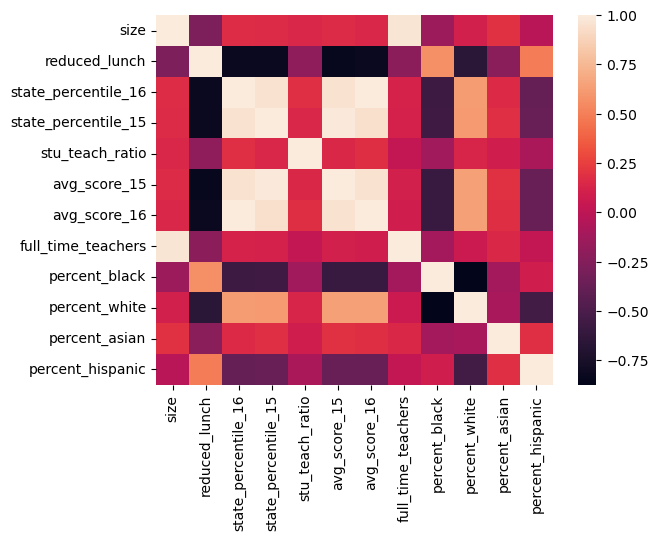

In [8]:

#korelasyonlara bakalım
plt.figure()
cor=X.corr()
sns.heatmap(cor)
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # 'median' veya 'most_frequent' stratejilerini de kullanabilirsiniz
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Test setine de aynı işlemi uygulayın


In [16]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
y_pred2

array([3., 1., 4., 4., 1., 5., 2., 2., 0., 2., 1., 2., 5., 4., 2., 4., 4.,
       5., 5., 5., 1., 4., 5., 4., 3., 3., 3., 3., 5., 1., 4., 1., 4., 0.,
       3., 4., 2., 2., 1., 3., 2., 1., 5., 4., 1., 5., 5., 1., 3., 2., 4.,
       0., 5., 4., 4., 1., 2., 1., 5., 5., 1., 4., 4., 3., 4., 3., 0., 4.,
       4., 2., 5., 5., 0., 2., 5., 5., 5., 3., 4., 2., 4., 0., 5., 1., 3.,
       0., 5.])

Confusion matrix:
[[ 7  0  0  0  0  0]
 [ 0 14  0  0  0  0]
 [ 0  0 13  2  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 20]]


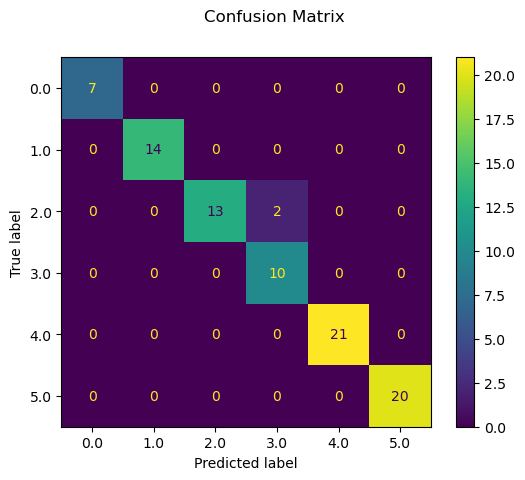

In [17]:
from sklearn import datasets, metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.9770114942528736